In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('../logs/fig_1_20230419-200312_2.csv')
data

,Operation,Size (MB),Ratio,Latency,Throughput
0,WRITE,8192,1.0,5.98,100399.00
1,WRITE,8192,0.8,6.19,146086.00
2,WRITE,16384,1.0,7.28,89118.80
3,WRITE,16384,0.8,7.58,122356.00
4,WRITE,24576,1.0,8.79,78531.40
5,WRITE,24576,0.8,9.19,102228.00
6,WRITE,32768,1.0,9.47,74539.30
7,WRITE,32768,0.8,10.38,91156.20
8,SHORT SCAN,8192,1.0,381.16,2352.08
9,SHORT SCAN,8192,0.8,431.90,2099.85


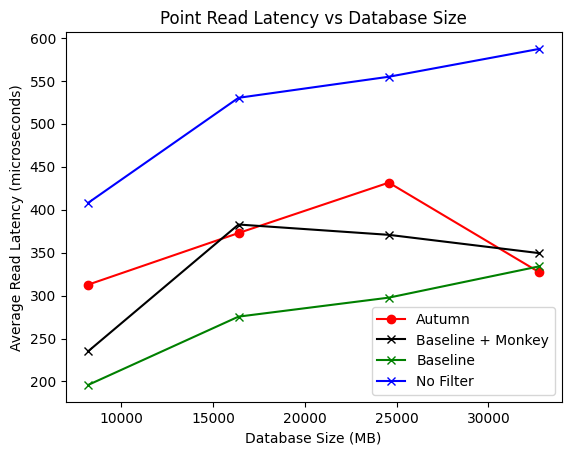

In [11]:
reads = data[data["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]
full_baseline_reads = data[data["Operation"] == "READ NO MONKEY"]
full_reads_nofilter = data[data["Operation"] == "READ NO FILTER"]
base_reads_nofilter = full_reads_nofilter[full_reads_nofilter["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")
plt.plot(full_baseline_reads.loc[:, "Size (MB)"], full_baseline_reads.loc[:, "Latency"], marker='x', color="green")
plt.plot(base_reads_nofilter.loc[:, "Size (MB)"], base_reads_nofilter.loc[:, "Latency"], marker='x', color="blue")



plt.title("Point Read Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline + Monkey", "Baseline", "No Filter"])
# # plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")



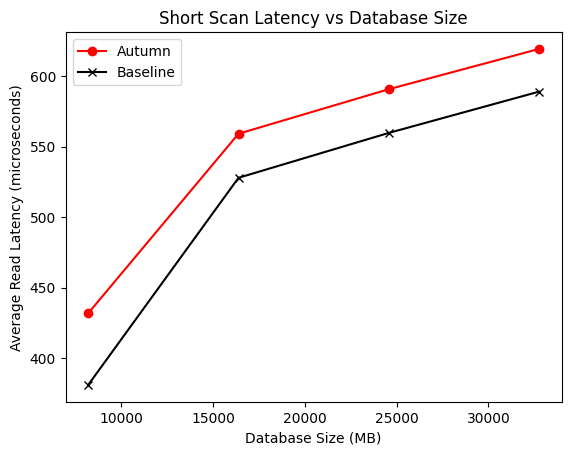

In [5]:
reads = data[data["Operation"] == "SHORT SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Short Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

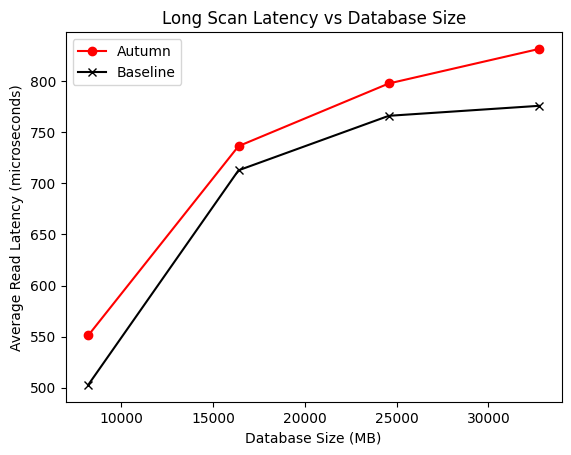

In [7]:
reads = data[data["Operation"] == "LONG SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Long Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

In [ ]:
reads = data[data["Operation"] == "WRITE"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Write Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Write Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

In [ ]:
data2 = pd.read_csv('../logs/space_amp_20230329-192055.csv')
data2


In [ ]:
base = data2[data2["Ratio"] == 1]
test = data2[data2["Ratio"] < 1]

plt.plot(test.loc[:, "Value Size"], test.loc[:, "Actual Size"], marker= 'o', color="red")
plt.plot(base.loc[:, "Value Size"], base.loc[:, "Actual Size"], marker='x', color="black")


plt.title("Value Size vs DB Size")
plt.xlabel("Value Size (bytes)")
plt.ylabel("Actual Database Size (bytes)")
plt.legend(["Autumn", "Baseline"])